In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

from rdkit import Chem
# suppress rdkit warning
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid")

In [2]:
def convert2cls(chir, csp_category): 
    if csp_category == '1': 
        # For polysaccharide CSPs:
        if chir < 1.15:
            y = 0
        elif chir < 1.2:
            y = 1
        elif chir < 2.1:
            y = 2
        else:
            y = 3
    elif csp_category == '2': 
        # For Pirkle CSPs:
        if chir < 1.05: 
            y = 0
        elif chir < 1.15:
            y = 1
        elif chir < 2: 
            y = 2
        else:
            y = 3
    else:
        raise Exception("The category for CSP should be 1 or 2, rather than {}.".format(csp_category))
    return y

## ChirBase

In [3]:
suppl = Chem.SDMolSupplier("../data/ChirBase/chirbase_clean.sdf")
mols = [x for x in suppl if x is not None]

In [4]:
df_dict = {'SMILES': [], 'isomer_SMILES': [], 'MB': [], 'CSP_category': [], 'K2/K1': [], 'Y': []}

for mol in mols: 
    if mol.HasProp('encode_mobile_phase'):
        mb = mol.GetProp('encode_mobile_phase')
    else:
        mb = 'unknown'
    smiles = Chem.MolToSmiles(mol, isomericSmiles=False)
    smiles_iso = Chem.CanonSmiles(Chem.MolToSmiles(mol))
    chir = round(float(mol.GetProp('k2/k1')), 4)
    y = convert2cls(chir, mol.GetProp('mobile_phase_category'))
    
    df_dict['SMILES'].append(smiles)
    df_dict['isomer_SMILES'].append(smiles_iso)
    df_dict['K2/K1'].append(chir)
    df_dict['MB'].append(mb)
    df_dict['CSP_category'].append(mol.GetProp('mobile_phase_category'))
    df_dict['Y'].append(y)

df = pd.DataFrame.from_dict(df_dict)

In [5]:
df['MB'] = df['MB'].astype(int)
# MB_dict = {91423: 'Chiralpak IB', 91119: 'Chirobiotic TAG', 90879: 'Chirobiotic T', 90704: 'Chirobiotic V', 90589: 'Whelk-O', 
#            90357: 'Cyclobond I RN', 90246: 'Chiralcel OJ (Lux Cellulose-3)', 90211: 'Pirkle (R or S)-DNBPG', 
#            45173: 'Chiralcel OD (Lux Cellulose-1)', 45167: 'Chiralpak AS', 44869: 'Chiralcel OB',
#            23735: 'Chiralpak AD', 15723: 'Chirobiotic R', 394: 'Chiral-AGP', 91518: 'Chiralpak IC (Sepapak 5)', 
#            2: 'Cyclobond I', 45172: 'Chiralpak IA', 3575: 'Ultron-ES-OVM',}
MB_dict = {0: 'Chiralpak IB', 1: 'Chirobiotic TAG', 2: 'Chirobiotic T', 3: 'Chirobiotic V', 4: 'Whelk-O', 
           5: 'Cyclobond I RN', 6: 'Chiralcel OJ (Lux Cellulose-3)', 7: 'Pirkle (R or S)-DNBPG', 
           8: 'Chiralcel OD (Lux Cellulose-1)', 9: 'Chiralpak AS', 10: 'Chiralcel OB',
           11: 'Chiralpak AD', 12: 'Chirobiotic R', 13: 'Chiral-AGP', 14: 'Chiralpak IC (Sepapak 5)', 
           15: 'Cyclobond I', 16: 'Chiralpak IA', 17: 'Ultron-ES-OVM',}
df['Column'] = df['MB'].apply(lambda x: MB_dict[x])

In [6]:
df

,SMILES,isomer_SMILES,MB,CSP_category,K2/K1,Y,Column
0,CCC(=O)OC(C)c1ccccc1,CCC(=O)O[C@@H](C)c1ccccc1,15,1,1.0100,0,Cyclobond I
1,CC(=O)OC(C)c1ccccc1,CC(=O)O[C@@H](C)c1ccccc1,15,1,1.0300,0,Cyclobond I
2,O=C(O)C(Cl)c1ccccc1,O=C(O)[C@@H](Cl)c1ccccc1,15,1,1.0300,0,Cyclobond I
3,CCCC(C(N)=O)c1ccc(O)c(O)c1,CCC[C@@H](C(N)=O)c1ccc(O)c(O)c1,15,1,1.3100,2,Cyclobond I
4,COc1ccccc1C(C)O,COc1ccccc1[C@H](C)O,15,1,1.0400,0,Cyclobond I
...,...,...,...,...,...,...,...
43962,O=C(c1ccccc1)c1ccc2n1CCC2C(=O)O,O=C(c1ccccc1)c1ccc2n1CC[C@H]2C(=O)O,13,2,2.0000,3,Chiral-AGP
43963,CCOc1ccccc1OCCNC(C)Cc1ccc(OC)c(S(N)(=O)=O)c1,CCOc1ccccc1OCCN[C@@H](C)Cc1ccc(OC)c(S(N)(=O)=O)c1,11,2,1.8069,2,Chiralpak AD
43964,CCCS(=O)c1ccc2[nH]c(NC(=O)OC)nc2c1,CCC[S@@](=O)c1ccc2[nH]c(NC(=O)OC)nc2c1,16,1,2.1600,3,Chiralpak IA
43965,NC(=S)N1N=C(c2ccc(-c3ccccc3)cc2)CC1c1ccccc1,NC(=S)N1N=C(c2ccc(-c3ccccc3)cc2)C[C@@H]1c1ccccc1,6,2,5.0000,3,Chiralcel OJ (Lux Cellulose-3)


## CMRT

In [7]:
df_rt = pd.read_csv('../data/CMRT/cmrt_all_column.csv', index_col=0)

df_rt['isomer_SMILES'] = df_rt['SMILES'].apply(lambda x: Chem.CanonSmiles(Chem.MolToSmiles(Chem.MolFromSmiles(x), 
                                                                                    isomericSmiles=True)))
df_rt['SMILES'] = df_rt['SMILES'].apply(lambda x: Chem.CanonSmiles(Chem.MolToSmiles(Chem.MolFromSmiles(x), 
                                                                                    isomericSmiles=False)))

# df_rt = df_rt.sort_values(['index', 'RT'], ascending=False)

df_rt = df_rt[df_rt['RT'] != 0]
df_rt = df_rt.groupby(['index']).filter(lambda x: len(x) == 2)

In [8]:
df_rt

,index,SMILES,RT,Speed,i-PrOH_proportion,Literature,Column,isomer_SMILES
0,0,COC(=O)N(C)C(Cc1ccccc1)B1OC(C)(C)C(C)(C)O1,2.14,0.5,0.05,10.1039/C9SC04534A,OJ3,COC(=O)N(C)[C@H](Cc1ccccc1)B1OC(C)(C)C(C)(C)O1
1,0,COC(=O)N(C)C(Cc1ccccc1)B1OC(C)(C)C(C)(C)O1,1.81,0.5,0.05,10.1039/C9SC04534A,OJ3,COC(=O)N(C)[C@@H](Cc1ccccc1)B1OC(C)(C)C(C)(C)O1
3,2,Cc1ccc(S(=O)(=O)CC(C)c2ccc(C(F)(F)F)cc2)cc1,2.13,0.5,0.30,10.1039/C8QO01291A,IA,Cc1ccc(S(=O)(=O)C[C@@H](C)c2ccc(C(F)(F)F)cc2)cc1
4,2,Cc1ccc(S(=O)(=O)CC(C)c2ccc(C(F)(F)F)cc2)cc1,2.30,0.5,0.30,10.1039/C8QO01291A,IA,Cc1ccc(S(=O)(=O)C[C@H](C)c2ccc(C(F)(F)F)cc2)cc1
5,3,Fc1cccc(C2NCc3ccccc3-c3ccccc32)c1,2.00,0.5,0.20,10.1039/C8SC04482A,OD3,Fc1cccc([C@@H]2NCc3ccccc3-c3ccccc32)c1
...,...,...,...,...,...,...,...,...
25860,14142,COC(=O)C(Cc1ccc2ccccc2c1)OC(=O)c1ccccc1,98.30,1.0,0.15,10.1002/adsc.201800774,OJH,COC(=O)[C@H](Cc1ccc2ccccc2c1)OC(=O)c1ccccc1
25862,14144,COc1ccc2c(c1)C(C=Cc1ccccc1)(CO)C(=O)N2COCc1ccccc1,119.10,0.8,0.05,10.31635/ccschem.019.20190064,IC3,COc1ccc2c(c1)[C@](/C=C/c1ccccc1)(CO)C(=O)N2COC...
25863,14144,COc1ccc2c(c1)C(C=Cc1ccccc1)(CO)C(=O)N2COCc1ccccc1,98.90,0.8,0.05,10.31635/ccschem.019.20190064,IC3,COc1ccc2c(c1)[C@@](/C=C/c1ccccc1)(CO)C(=O)N2CO...
25864,14145,O=C1OC(OC(=O)C(c2ccccc2)c2ccccc2)c2cccc(F)c21,75.30,0.8,0.10,10.1002/anie.202012445,IC3,O=C1O[C@H](OC(=O)C(c2ccccc2)c2ccccc2)c2cccc(F)c21


In [9]:
df_rt_alpha = df_rt.groupby('index').apply(lambda x: (x['RT'].max() - 2.9) / (x['RT'].min() -2.9)).to_frame(name='K2/K1')
df_rt_alpha = df_rt_alpha.merge(df_rt[['index', 'SMILES', 'isomer_SMILES', 'Column', 'RT']], on='index', how='left')
# df_rt_alpha = df_rt_alpha[df_rt_alpha.duplicated()]

In [10]:
df_rt_alpha

,index,K2/K1,SMILES,isomer_SMILES,Column,RT
0,0,0.697248,COC(=O)N(C)C(Cc1ccccc1)B1OC(C)(C)C(C)(C)O1,COC(=O)N(C)[C@H](Cc1ccccc1)B1OC(C)(C)C(C)(C)O1,OJ3,2.14
1,0,0.697248,COC(=O)N(C)C(Cc1ccccc1)B1OC(C)(C)C(C)(C)O1,COC(=O)N(C)[C@@H](Cc1ccccc1)B1OC(C)(C)C(C)(C)O1,OJ3,1.81
2,2,0.779221,Cc1ccc(S(=O)(=O)CC(C)c2ccc(C(F)(F)F)cc2)cc1,Cc1ccc(S(=O)(=O)C[C@@H](C)c2ccc(C(F)(F)F)cc2)cc1,IA,2.13
3,2,0.779221,Cc1ccc(S(=O)(=O)CC(C)c2ccc(C(F)(F)F)cc2)cc1,Cc1ccc(S(=O)(=O)C[C@H](C)c2ccc(C(F)(F)F)cc2)cc1,IA,2.30
4,3,0.666667,Fc1cccc(C2NCc3ccccc3-c3ccccc32)c1,Fc1cccc([C@@H]2NCc3ccccc3-c3ccccc32)c1,OD3,2.00
...,...,...,...,...,...,...
23433,14142,4.416667,COC(=O)C(Cc1ccc2ccccc2c1)OC(=O)c1ccccc1,COC(=O)[C@H](Cc1ccc2ccccc2c1)OC(=O)c1ccccc1,OJH,98.30
23434,14144,1.210417,COc1ccc2c(c1)C(C=Cc1ccccc1)(CO)C(=O)N2COCc1ccccc1,COc1ccc2c(c1)[C@](/C=C/c1ccccc1)(CO)C(=O)N2COC...,IC3,119.10
23435,14144,1.210417,COc1ccc2c(c1)C(C=Cc1ccccc1)(CO)C(=O)N2COCc1ccccc1,COc1ccc2c(c1)[C@@](/C=C/c1ccccc1)(CO)C(=O)N2CO...,IC3,98.90
23436,14145,1.335635,O=C1OC(OC(=O)C(c2ccccc2)c2ccccc2)c2cccc(F)c21,O=C1O[C@H](OC(=O)C(c2ccccc2)c2ccccc2)c2cccc(F)c21,IC3,75.30


## Compare

In [11]:
set(df_rt_alpha['Column'].tolist())

{'AD',
 'AD3',
 'ADH',
 'AS',
 'ASH',
 'AZ',
 'IA',
 'IAH',
 'IAU',
 'IB',
 'IC',
 'IC3',
 'ICH',
 'ID',
 'IE',
 'IF',
 'IF3',
 'IG',
 'OD',
 'OD3',
 'ODH',
 'OJ',
 'OJ3',
 'OJH',
 'OZ3'}

In [12]:
set(df['Column'].tolist())

{'Chiral-AGP',
 'Chiralcel OB',
 'Chiralcel OD (Lux Cellulose-1)',
 'Chiralcel OJ (Lux Cellulose-3)',
 'Chiralpak AD',
 'Chiralpak AS',
 'Chiralpak IA',
 'Chiralpak IB',
 'Chiralpak IC (Sepapak 5)',
 'Chirobiotic R',
 'Chirobiotic T',
 'Chirobiotic TAG',
 'Chirobiotic V',
 'Cyclobond I',
 'Cyclobond I RN',
 'Pirkle (R or S)-DNBPG',
 'Ultron-ES-OVM',
 'Whelk-O'}

In [13]:
Col_map = {'Chiralcel OD (Lux Cellulose-1)': 'OD',
          'Chiralcel OJ (Lux Cellulose-3)': 'OJ', 
          'Chiralpak AD': 'AD',
          'Chiralpak AS': 'AS',
          'Chiralpak IA': 'IA',
          'Chiralpak IB': 'IB',
          'Chiralpak IC (Sepapak 5)': 'IC',}

df['Column_map'] = df['Column'].apply(lambda x: Col_map[x] if x in Col_map.keys() else np.nan)

In [14]:
df

,SMILES,isomer_SMILES,MB,CSP_category,K2/K1,Y,Column,Column_map
0,CCC(=O)OC(C)c1ccccc1,CCC(=O)O[C@@H](C)c1ccccc1,15,1,1.0100,0,Cyclobond I,NaN
1,CC(=O)OC(C)c1ccccc1,CC(=O)O[C@@H](C)c1ccccc1,15,1,1.0300,0,Cyclobond I,NaN
2,O=C(O)C(Cl)c1ccccc1,O=C(O)[C@@H](Cl)c1ccccc1,15,1,1.0300,0,Cyclobond I,NaN
3,CCCC(C(N)=O)c1ccc(O)c(O)c1,CCC[C@@H](C(N)=O)c1ccc(O)c(O)c1,15,1,1.3100,2,Cyclobond I,NaN
4,COc1ccccc1C(C)O,COc1ccccc1[C@H](C)O,15,1,1.0400,0,Cyclobond I,NaN
...,...,...,...,...,...,...,...,...
43962,O=C(c1ccccc1)c1ccc2n1CCC2C(=O)O,O=C(c1ccccc1)c1ccc2n1CC[C@H]2C(=O)O,13,2,2.0000,3,Chiral-AGP,NaN
43963,CCOc1ccccc1OCCNC(C)Cc1ccc(OC)c(S(N)(=O)=O)c1,CCOc1ccccc1OCCN[C@@H](C)Cc1ccc(OC)c(S(N)(=O)=O)c1,11,2,1.8069,2,Chiralpak AD,AD
43964,CCCS(=O)c1ccc2[nH]c(NC(=O)OC)nc2c1,CCC[S@@](=O)c1ccc2[nH]c(NC(=O)OC)nc2c1,16,1,2.1600,3,Chiralpak IA,IA
43965,NC(=S)N1N=C(c2ccc(-c3ccccc3)cc2)CC1c1ccccc1,NC(=S)N1N=C(c2ccc(-c3ccccc3)cc2)C[C@@H]1c1ccccc1,6,2,5.0000,3,Chiralcel OJ (Lux Cellulose-3),OJ


In [15]:
df_all = df_rt_alpha[['SMILES', 'Column', 'K2/K1']].merge(df[['SMILES', 'Column', 'K2/K1', 'Column_map', 'CSP_category']], 
                           left_on=['Column', 'SMILES'], 
                           right_on=['Column_map', 'SMILES'], how='inner')

Find the rule for choosing configuration in ChirBase? 

In [16]:
def chiral_tag(s): 
    mol = Chem.MolFromSmiles(s)
    for atom in mol.GetAtoms():
        if str(atom.GetChiralTag()) == 'CHI_TETRAHEDRAL_CCW':
            return 'S'
        elif str(atom.GetChiralTag()) == 'CHI_TETRAHEDRAL_CW':
            return 'R'
    return np.nan 

def config_compare(chosen_s, posible_s, rts): 
    assert len(chosen_s) == len(posible_s) == len(rts) == 2 
    if chosen_s[0] == posible_s[0]:
        if rts[0] > rts[1]:
            return 'High'
        elif rts[0] == rts[1]:
            return 'Same'
        else:
            return 'Low'
    elif chosen_s[0] == posible_s[1]:
        if rts[0] < rts[1]: 
            return 'High'
        elif rts[0] == rts[1]:
            return 'Same'
        else:
            return 'Low'
    else:
        return np.nan

df_all_tmp = df_rt_alpha[['SMILES', 'isomer_SMILES', 'Column', 'K2/K1', 'RT']].merge(df[['SMILES', 'isomer_SMILES', 'Column', 'K2/K1', 'Column_map', 'CSP_category']], 
                           left_on=['Column', 'SMILES'], 
                           right_on=['Column_map', 'SMILES'], how='inner')
df_all_tmp = df_all_tmp.groupby('SMILES').filter(lambda x: len(x)==2).reset_index(drop=True)
df_all_config = df_all_tmp.groupby('SMILES').apply(lambda x: config_compare(x['isomer_SMILES_y'].tolist(), 
                                                                       x['isomer_SMILES_x'].tolist(), 
                                                                       x['RT'].tolist())).to_frame(name='config_choice')
df_all_chiral_tag = df_all_tmp['isomer_SMILES_y'].apply(lambda x: chiral_tag(x)).to_frame(name='chiral_tag')

df_all_tmp = df_all_tmp.merge(df_all_config, 
                              on='SMILES', 
                              how='left').merge(df_all_chiral_tag, 
                                                left_index=True, 
                                                right_index=True, 
                                                how='left')

# df_all_tmp.to_csv('./chirbase_configuration_choice.csv', sep='\t', index=False)

In [17]:
high_rate = len(df_all_tmp[df_all_tmp['config_choice'] == 'High']) / len(df_all_tmp)
low_rate = len(df_all_tmp[df_all_tmp['config_choice'] == 'Low']) / len(df_all_tmp)

print('{:.2f}% configurations have higher retention times'.format(high_rate*100))
print('{:.2f}% configurations have lower retention times'.format(low_rate*100))

77.38% configurations have higher retention times
21.43% configurations have lower retention times


In [18]:
df_all['Y_x'] = df_all.apply(lambda x: convert2cls(x['K2/K1_x'], x['CSP_category']), axis=1)
df_all['Y_y'] = df_all.apply(lambda x: convert2cls(x['K2/K1_y'], x['CSP_category']), axis=1)

df_all['Y_x2'] = df_all['Y_x'].apply(lambda x: 0 if x == 0 or x == 1 else 1)
df_all['Y_y2'] = df_all['Y_y'].apply(lambda x: 0 if x == 0 or x == 1 else 1)

In [19]:
df_all

,SMILES,Column_x,K2/K1_x,Column_y,K2/K1_y,Column_map,CSP_category,Y_x,Y_y,Y_x2,Y_y2
0,CCOC(=O)C(CNC(C)=O)(Sc1ccc(C)cc1)c1ccccc1,OD,1.308036,Chiralcel OD (Lux Cellulose-1),1.3092,OD,2,2,2,1,1
1,CCOC(=O)C(CNC(C)=O)(Sc1ccc(C)cc1)c1ccccc1,OD,1.308036,Chiralcel OD (Lux Cellulose-1),1.3092,OD,2,2,2,1,1
2,CCOC(=O)C(C[N+](=O)[O-])(Sc1ccc(C(C)(C)C)cc1)c...,AS,1.259358,Chiralpak AS,1.2599,AS,2,2,2,1,1
3,CCOC(=O)C(C[N+](=O)[O-])(Sc1ccc(C(C)(C)C)cc1)c...,AS,1.259358,Chiralpak AS,1.2599,AS,2,2,2,1,1
4,CCOC(=O)C(C[N+](=O)[O-])(Sc1cc(C)cc(C)c1)c1ccccc1,AD,1.084337,Chiralpak AD,1.0845,AD,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
171,CCOC(=O)C1=C(C=Cc2ccccc2)OC(=O)CC1c1ccc(Cl)cc1,IA,1.190407,Chiralpak IA,1.1906,IA,1,1,1,0,0
172,C=CCC(O)COCc1ccccc1,AS,1.254545,Chiralpak AS,1.2800,AS,2,2,2,1,1
173,C=CCC(O)COCc1ccccc1,AS,1.254545,Chiralpak AS,1.2800,AS,2,2,2,1,1
174,CCCCC=CC1(C)NS(=O)(=O)c2ccccc21,AD,1.254545,Chiralpak AD,1.2150,AD,2,2,2,1,1


In [20]:
df_all.to_csv('../data/compare_chirbase_cmrt.csv', index=False)
print('Save the comparison results!')

Save the comparison results!


In [21]:
len(df_all[df_all['Y_x'] == df_all['Y_y']])

162

In [22]:
len(df_all[df_all['Y_x'] == df_all['Y_y']]) / len(df_all)

0.9204545454545454

In [23]:
len(df_all[df_all['Y_x2'] == df_all['Y_y2']])

170

In [24]:
len(df_all[df_all['Y_x2'] == df_all['Y_y2']]) / len(df_all)

0.9659090909090909

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


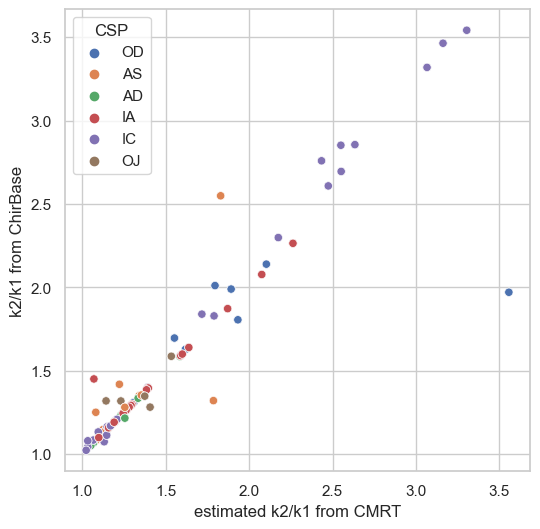

r2: 0.8460983845913346


In [25]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(data=df_all, x="K2/K1_x", y="K2/K1_y", hue="Column_x", ax=ax)

ax.set(xlabel='estimated k2/k1 from CMRT', ylabel='k2/k1 from ChirBase')
plt.legend(title='CSP')
plt.savefig('./compare_chirbase_cmrt.eps', dpi=600, bbox_inches='tight', format='eps')
plt.savefig('./compare_chirbase_cmrt.png', dpi=600, bbox_inches='tight')
plt.show()

print('r2:', r2_score(df_all['K2/K1_x'], df_all['K2/K1_y']))